In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from statsmodels.formula.api import glm

(a)

In [24]:
np . random . seed (2020)
x = np.random.normal(0,1,100)
y = x - 2*x**2 + np.random.normal(0, 1, 100)

(b)

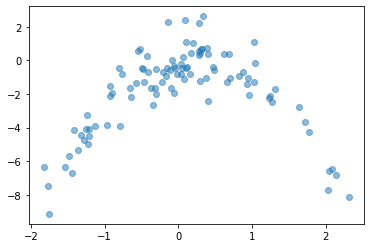

In [25]:
plt.scatter(x, y, alpha=0.5)
plt.show()

(c)

In [26]:
np.random.seed(1)

x = np.random.normal(0,1,100)
y = x - 2 * x**2 + np.random.normal(0,1,100)

d = {'x':x, 'y':y}
df = pd.DataFrame(data=d)

model = glm('y ~ x', df)

lm = skl_lm.LinearRegression()

x_arr = np.array(x).reshape(-1,1)
y_train = np.array(y).reshape(-1,1)

model = lm.fit(x_arr, y_train)

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_arr)

model2 = lm.fit(x_train, y_train)

In [27]:
LOOCV = LeaveOneOut()
LOOCV.get_n_splits(x_arr)

100

In [28]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x_arr)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 6.238250004502408, STD: 4.011576337763809
Degree-2 polynomial MSE: 0.9131601038696964, STD: 0.4347724030889471
Degree-3 polynomial MSE: 0.9118181094477192, STD: 0.42334218150002323
Degree-4 polynomial MSE: 0.8706041448824122, STD: 0.38616006497768296
Degree-5 polynomial MSE: 0.8811362384227891, STD: 0.3849084176876693


(d)

In [34]:
np.random.seed(111)

x = np.random.normal(0,1,100)
y = x - 2 * x**2 + np.random.normal(0,1,100)

d = {'x':x, 'y':y}
df = pd.DataFrame(data=d)

lm = skl_lm.LinearRegression()

x_arr = np.array(x).reshape(-1,1)
y_train = np.array(y).reshape(-1,1)

model = lm.fit(x_arr, y_train)

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_arr)

model2 = lm.fit(x_train, y_train)

LOOCV = LeaveOneOut()
LOOCV.get_n_splits(x_arr)

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x_arr)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 8.630688107962374, STD: 5.301205257778522
Degree-2 polynomial MSE: 1.0349095873024967, STD: 0.2938914936341289
Degree-3 polynomial MSE: 1.0787787765829544, STD: 0.33194362619116763
Degree-4 polynomial MSE: 1.0817769059399036, STD: 0.3014838948115349
Degree-5 polynomial MSE: 1.1063489227109367, STD: 0.30311117903975976


(e)

(f)

In [30]:
formula4 = 'y ~ x + I(x**2) + I(x**3) + I(x**4)'


model = glm(formula4, df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       95
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.94468
Method:                          IRLS   Log-Likelihood:                -136.48
Date:                Fri, 11 Mar 2022   Deviance:                       89.745
Time:                        12:55:27   Pearson chi2:                     89.7
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.144      0.007      0.994      -0.281       0.283
x              0.9504      0.188      5.047      0.000       0.581       1.319
I(x ** 2)     -1.9558      0.220     -8.879      0.000      -2.388      -1.524
I(x ** 3)      0.0295      0.066      0.444      0.657      -0.101       0.160
I(x ** 4)      0.0031      0.050      0.062      0.951      -0.095       0.101
==============================================================================
"""